# Simple text classification using ```scikit-learn```

## Import packages


In [13]:
# system tools
import os
import sys
sys.path.append("..")

# data munging tools
import pandas as pd
#import utils.classifier_utils as clf

# Machine learning stuff
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn import metrics

# Visualisation
import matplotlib.pyplot as plt

## Reading in the data

Our data is already in a tabular format, so we're going to load it using ```pandas```

In [14]:
filename = os.path.join("..", "..", "..", "431868", "classification_data", "fake_or_real_news.csv")

data = pd.read_csv(filename, index_col=0)

In [15]:
X = data["text"]
y = data["label"]

## Train-test split

Looking back at the code from last week, use the ```train_test_split()``` function to create an 80/20 split in the data.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,           # texts for the model
                                                    y,          # classification labels
                                                    test_size=0.2,   # create an 80/20 split
                                                    random_state=42) # random state for reproducibility

## Vectorizing and Feature Extraction

__Create vectorizer object__

Next, you want to create a vectorizer object. I suggest the following parameters:

- TfidfVectorizer on unigrams and bigrams;
- make everything lowercase; 
- remove top and bottom 5% of words; 
- keep the top 500 features.

In [5]:
vectorizer = TfidfVectorizer(ngram_range = (1,2),     # unigrams and bigrams (1 word and 2 word units)
                             lowercase =  True,       # why use lowercase?
                             max_df = 0.95,           # remove very common words
                             min_df = 0.05,           # remove very rare words
                             max_features = 500)      # keep only top 100 features


This vectorizer is then used to turn all of our documents into a vector of numbers, instead of text.

In [7]:
# first we fit the vectorizer to the training data...
X_train_feats = vectorizer.fit_transform(X_train)

#... then transform our test data
X_test_feats = vectorizer.transform(X_test)

# get feature names if needed
feature_names = vectorizer.get_feature_names_out()

In [11]:
#first fitty feature names
feature_names[:50]

array(['000', '10', '11', '2016', 'about', 'about the', 'according',
       'according to', 'across', 'act', 'actually', 'administration',
       'after', 'after the', 'again', 'against', 'ago', 'all', 'all of',
       'all the', 'already', 'also', 'america', 'american', 'americans',
       'among', 'an', 'and', 'and it', 'and that', 'and the', 'another',
       'anti', 'any', 'are', 'around', 'as', 'as the', 'as well', 'asked',
       'at', 'at least', 'at the', 'attack', 'attacks', 'away', 'back',
       'based', 'be', 'because'], dtype=object)

## Classifying and predicting

We now have to 'fit' the classifier to our data. This means that the classifier takes our data and finds correlations between features and labels.

These correlations are then the *model* that the classifier learns about our data. This model can then be used to predict the label for new, unseen data.

__Simple neural network__

We can define simple NN classifiers using the ```MLPClassifier``` class in ```scikit-learn```. I've done that for you here - can you see how it's been put together?

For more information, check out the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html).

In [12]:
classifier = MLPClassifier(activation = "logistic", #logistic --> binary output and use sigmoid function
                           hidden_layer_sizes = (20,), #20 hidden layers
                           max_iter=1000, # updating weights 1000 times
                           random_state = 42) # set.seed

In [13]:
#fitting the model
classifier.fit(X_train_feats, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(20,), max_iter=1000,
              random_state=42)

__Get predictions__

We want to use our trained model to get predicted labels on our test data.

In [14]:
y_pred = classifier.predict(X_test_feats) # predictions of Y

In [15]:
y_pred[:50]

array(['FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'REAL', 'FAKE',
       'REAL', 'REAL', 'REAL', 'REAL', 'REAL', 'FAKE', 'FAKE', 'FAKE',
       'FAKE', 'REAL', 'FAKE', 'FAKE', 'REAL', 'REAL', 'FAKE', 'FAKE',
       'REAL', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'REAL', 'REAL', 'FAKE',
       'FAKE', 'FAKE', 'FAKE', 'REAL', 'FAKE', 'FAKE', 'REAL', 'REAL',
       'REAL', 'REAL', 'REAL', 'FAKE', 'FAKE', 'REAL', 'FAKE', 'REAL',
       'FAKE', 'FAKE'], dtype='<U4')

## Evaluate

We can also do some quick calculations, in order to assess just how well our model performs.

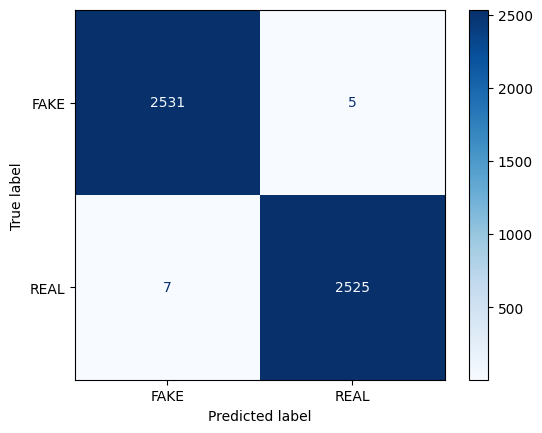

In [34]:
# use confusion matrix to check performance
metrics.ConfusionMatrixDisplay.from_estimator(classifier,           # the classifier name
                                            X_train_feats,          # the training features
                                            y_train,                # the training labels
                                            cmap=plt.cm.Blues,      # make the colours prettier
                                            labels=["FAKE", "REAL"])# the labels in your data arranged alphabetically

__Calculating metrics__

We can use the same built-in classification report from ```scikit-learn``` to get the classification report for our model.

In [17]:
# get classification report
classifier_metrics = metrics.classification_report(y_test, y_pred) #loss function
print(classifier_metrics) #over all accuracy 0.89 


              precision    recall  f1-score   support

        FAKE       0.90      0.87      0.88       628
        REAL       0.87      0.90      0.89       639

    accuracy                           0.89      1267
   macro avg       0.89      0.89      0.89      1267
weighted avg       0.89      0.89      0.89      1267



__Plotting loss curves__

If our model is learning well, we should see a smooth, steep downwards slope which tapers off towards a plateau. 

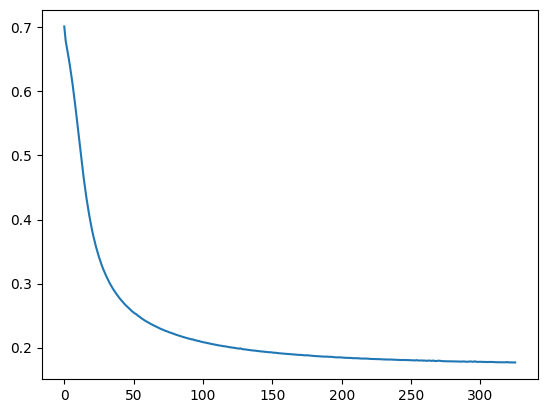

In [20]:
plt.plot(classifier.loss_curve_)

## Save models

As last week, it's possible to save an ```MLPClassifier``` model for later use using the library ```joblib```.

In [21]:
from joblib import dump, load
dump(classifier, "LR_classifier.joblib")
dump(vectorizer, "tfidf_vectorizer.joblib")

['tfidf_vectorizer.joblib']

We can restart the kernel for our notebook to see how that works:

In [22]:
from joblib import dump, load
loaded_clf = load("LR_classifier.joblib")
loaded_vect = load("tfidf_vectorizer.joblib")

# Comparing TF-IDF with BoW 

### Bag of Words approach

Make a vectorizer (bag of words)

In [37]:
bow_vectorizer = CountVectorizer(ngram_range = (1,2),     # unigrams and bigrams (1 word and 2 word units) så "to New York", new står ved siden af "to" og "york"
                             lowercase =  True,       # why use lowercase?
                             max_df = 0.95,           # remove very common words, fjerne alt der occurs i 95% af teksterne (stopwords)
                             min_df = 0.05,           # remove very rare words, fjerne alt der occurs i 5% af teksterne (OUTLIERS) (rare words, der ikke biddrager til classification, men til overfitting)
                             max_features = 500)      # keep only top 100 features (after removal of all above), this creates a 100 dimension vector

# basically gives 500 words (in a vectorizer) in the data that we wanna predict

### Extract features

In [38]:
# first we fit the vectorizer to the training data...
X_train_feats = bow_vectorizer.fit_transform(X_train)

#... then transform our test data
X_test_feats = bow_vectorizer.transform(X_test)

# get feature names if needed
feature_names = bow_vectorizer.get_feature_names_out()

### Make a classifier from the bag of words model

In [27]:
classifier = MLPClassifier(activation = "logistic", #logistic --> binary output and use sigmoid function
                           hidden_layer_sizes = (20,10), #20 hiddenlayer of 20 nodes, the number after the comma is another hidden layer of 10
                           max_iter=1000, # updating weights 1000 times
                           random_state = 42) # set.seed

In [28]:
#fitting the model
classifier.fit(X_train_feats, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(20,), max_iter=1000,
              random_state=42)

### Get predictions

In [29]:
y_pred = classifier.predict(X_test_feats) # predictions of Y

### Evaluate
Why use training data (x and y) and not test ?? 
- We do this in order to choose the best and most realistic model  (THAT  WE THEN APPLY TO THE TEST DATA)

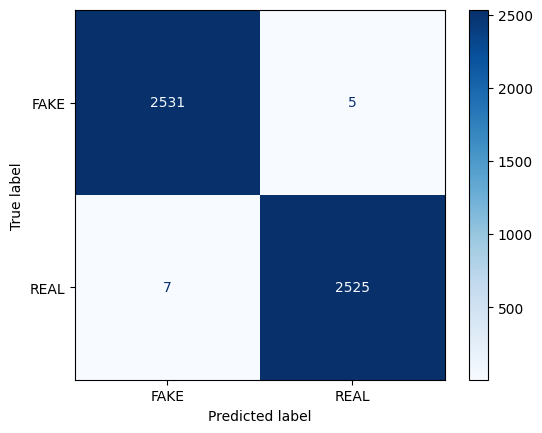

In [36]:
# use confusion matrix to check performance
metrics.ConfusionMatrixDisplay.from_estimator(classifier,           # the classifier name
                                            X_train_feats,          # the training features
                                            y_train,                # the training labels
                                            cmap=plt.cm.Blues,      # make the colours prettier
                                            labels=["FAKE", "REAL"])# the labels in your data arranged alphabetically

The BoW seems to perform better on the *training* data (but what it essential does -the BOW- is that it overfits). However both models TF-IDF and BoW seems to perform equally good on the *test*  data :))

- Remember we neva eva eva want 100% accuracy, because then its OvErFitTiNg ://///


### Calculating metrics of BOW model

In [31]:
# get classification report
classifier_metrics = metrics.classification_report(y_test, y_pred) #loss function
print(classifier_metrics) #over all accuracy 0.89 

              precision    recall  f1-score   support

        FAKE       0.90      0.87      0.88       628
        REAL       0.87      0.90      0.89       639

    accuracy                           0.89      1267
   macro avg       0.89      0.89      0.89      1267
weighted avg       0.89      0.89      0.89      1267



The BoW and TF-IDF vectorizer seems to perform equally "good". The accuracy score is both 89 in both models.

### Plot loss curves

If our model is learning well, we should see a smooth, steep downwards slope which tapers off towards a plateau. 

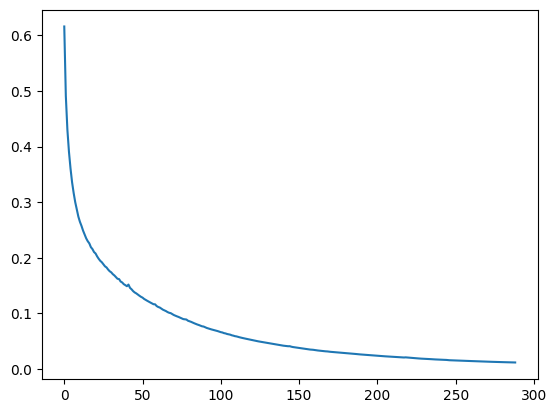

In [32]:
plt.plot(classifier.loss_curve_) 
# x-axis= interations (we defined 1000 itterations, but it stopped at 300 itterations, if it went further it would converge)

### Save models

In [ ]:
from joblib import dump, load
dump(classifier, "LR_classifier.joblib")
dump(bow_vectorizer, "bow_vectorizer.joblib")
#if I restart my notebook, I have now saved my models that I can reload them and use them imediately. See below

### Restart kernel

In [ ]:
from joblib import dump, load
loaded_clf = load("LR_classifier.joblib")
loaded_vect = load("tfidf_vectorizer.joblib")

Okiii:) So what happens if we tweak on some of the parameters: max and min df (when vectorizing), and defining differents amount of hidden layers in the classifier (classifier-step)